In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]


In [2]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [3]:
clf = clf.fit(X, Y)
clf

DecisionTreeClassifier()

In [4]:
# 일반 예측
clf.predict([[2., 2.]])

array([1])

In [5]:
# predict_proba 비율 예측
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

In [6]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

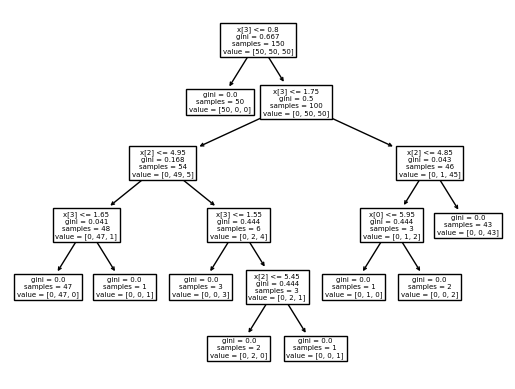

In [7]:
tree.plot_tree(clf)

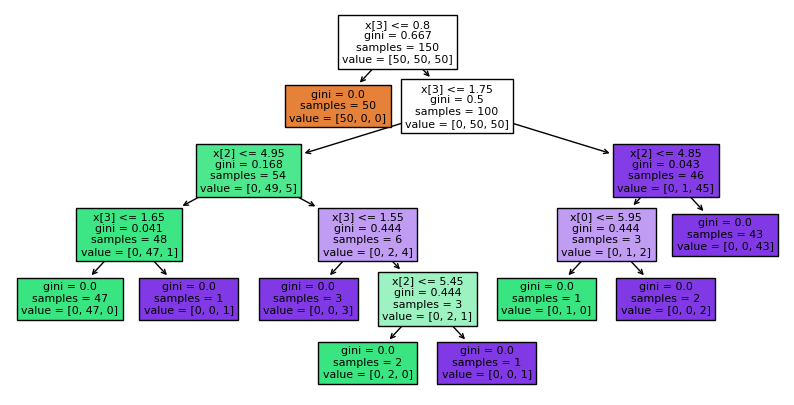

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
t = tree.plot_tree(clf, filled=True)

# 데이터 구성
* Pregnancies: 임신 횟수
* Glucose: 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure: 이완기 혈압 (mm Hg)
* SkinThickness: 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin: 2시간 혈청 인슐린 (mu U / ml)
* BMI: 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction: 당뇨병 혈통 기능
* Age: 나이
* Outcome: 768개 중에 268개의 결과 클래스 변수는 1이고 나머지는 0입니다.

## 필요한 라이브러리 로드

In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('C:/Users/beoms/Desktop/STUDY/Naver DSP 2024/N_DSP_2024/diabetes.csv')
df.shape

(768, 9)

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [12]:
# 8:2 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담기
split_count = int(df.shape[0] * 0.8)
split_count

614

In [13]:
# 슬라이싱으로 데이터를 나눈기
df[:]
df[:1]
train = df[:split_count].copy()
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1


In [14]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
train.columns
train.columns[:-1] # 마지막 outcome 제외
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
label_name = train.columns[-1]
label_name

'Outcome'

### 학습, 예측 데이터셋 만들기

In [17]:
# 학습세트
train[feature_names]
x_train = train[feature_names]
print(x_train.shape)

(614, 8)


In [18]:
# 정답 값
y_train = train[label_name]
y_train.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [19]:
# 예측에 사용하는 데이터세트
x_test = test[feature_names]
print(x_test.shape)
x_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [20]:
# 예측의 정답값
# Cross Validation?
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

### 학습(훈련)
* 시험을 볼 때 기출문제(x_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.


In [22]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### 예측
* 실전 시험문제(x_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [23]:
y_predict = model.predict(x_test)
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
      dtype=int64)

#### 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

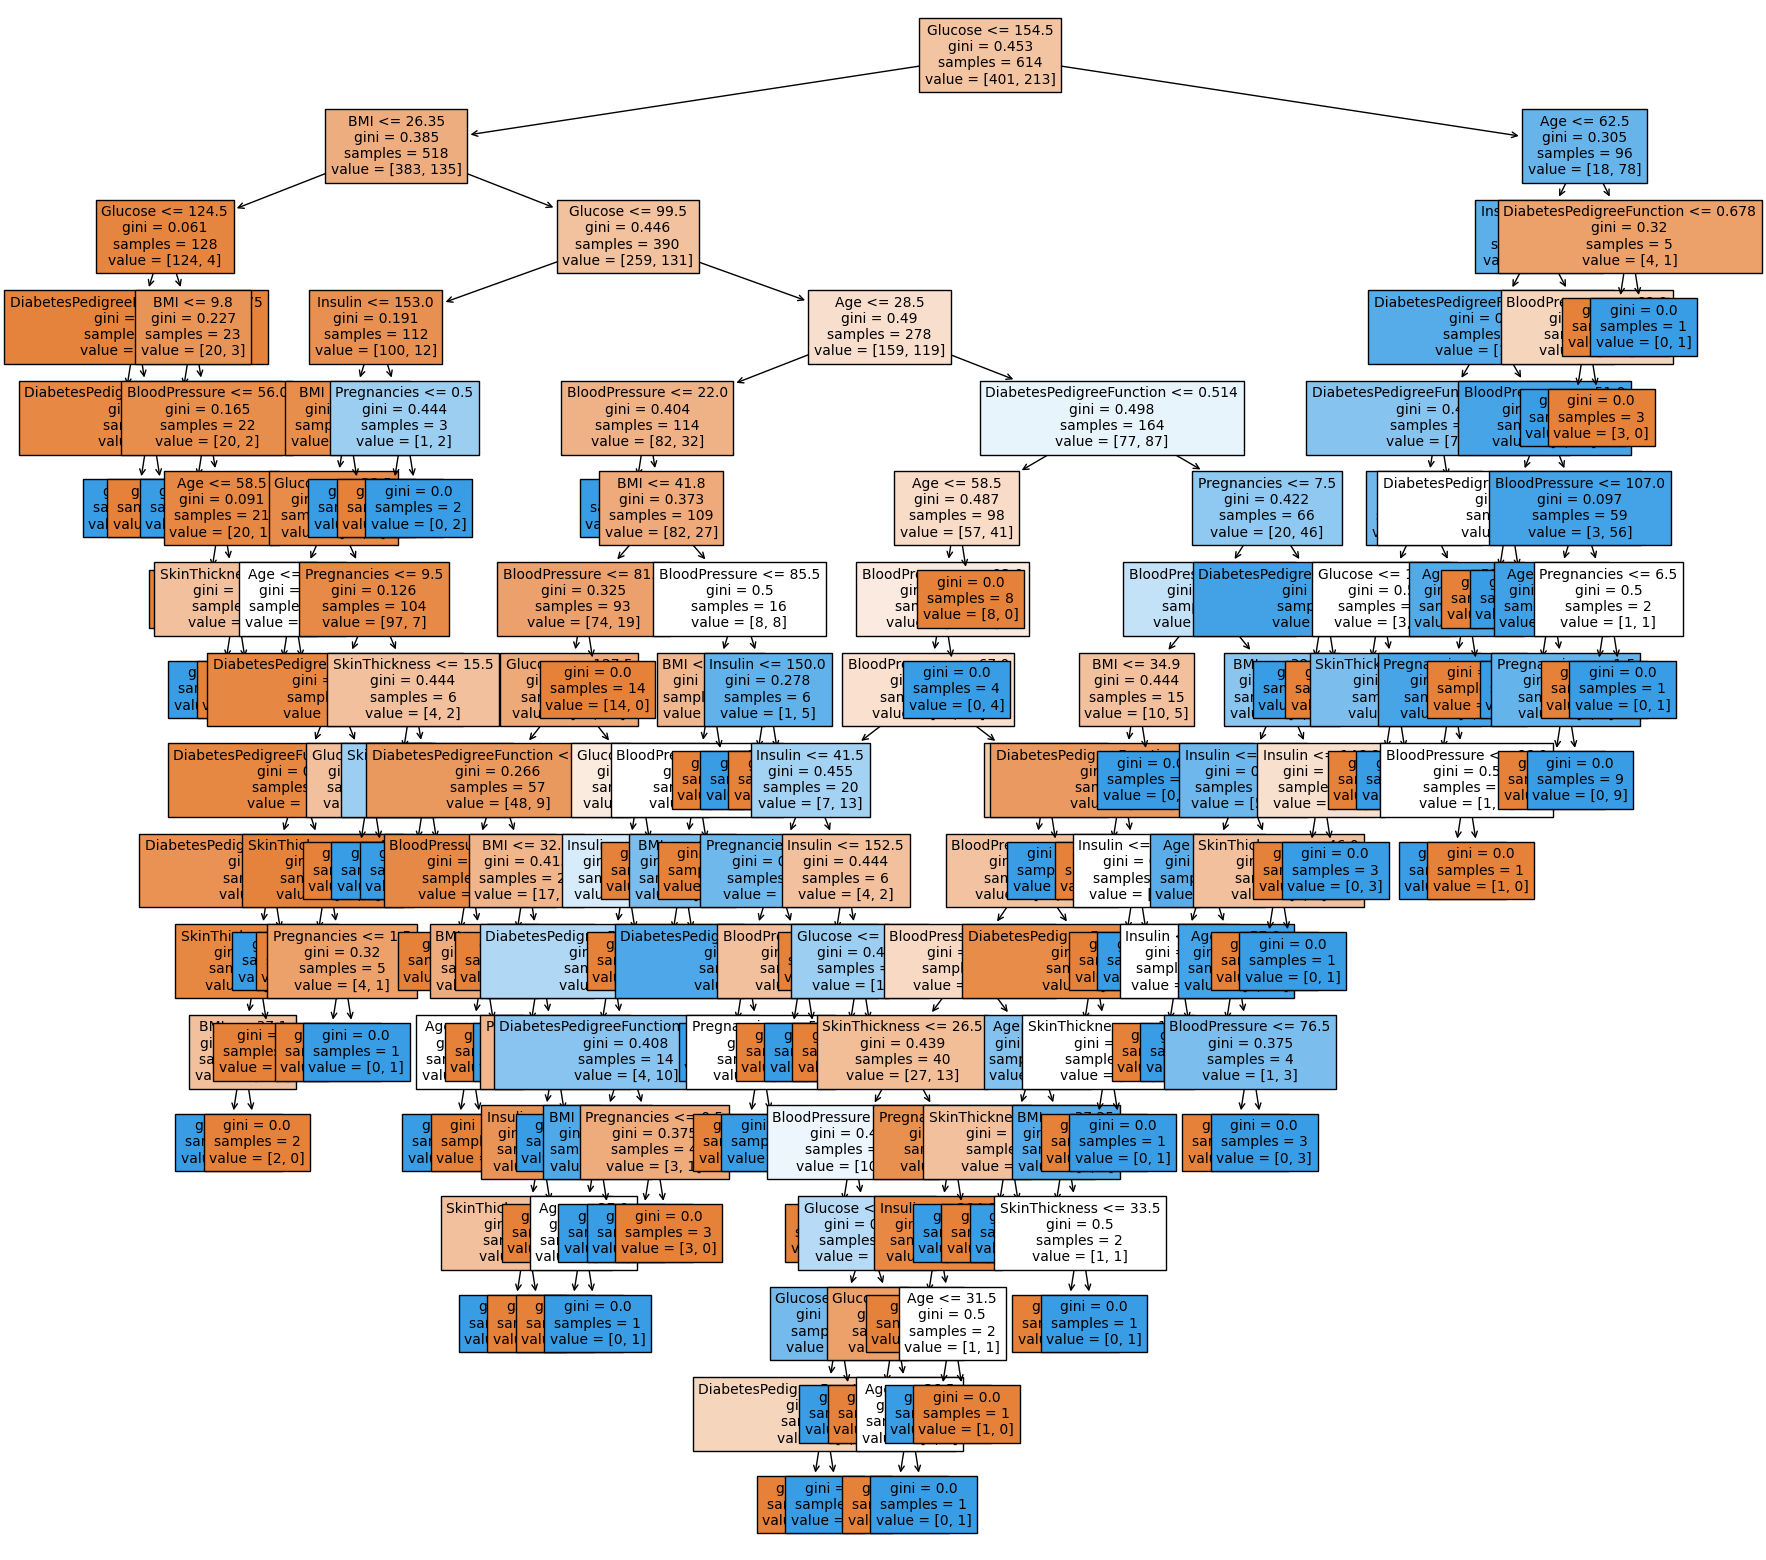

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

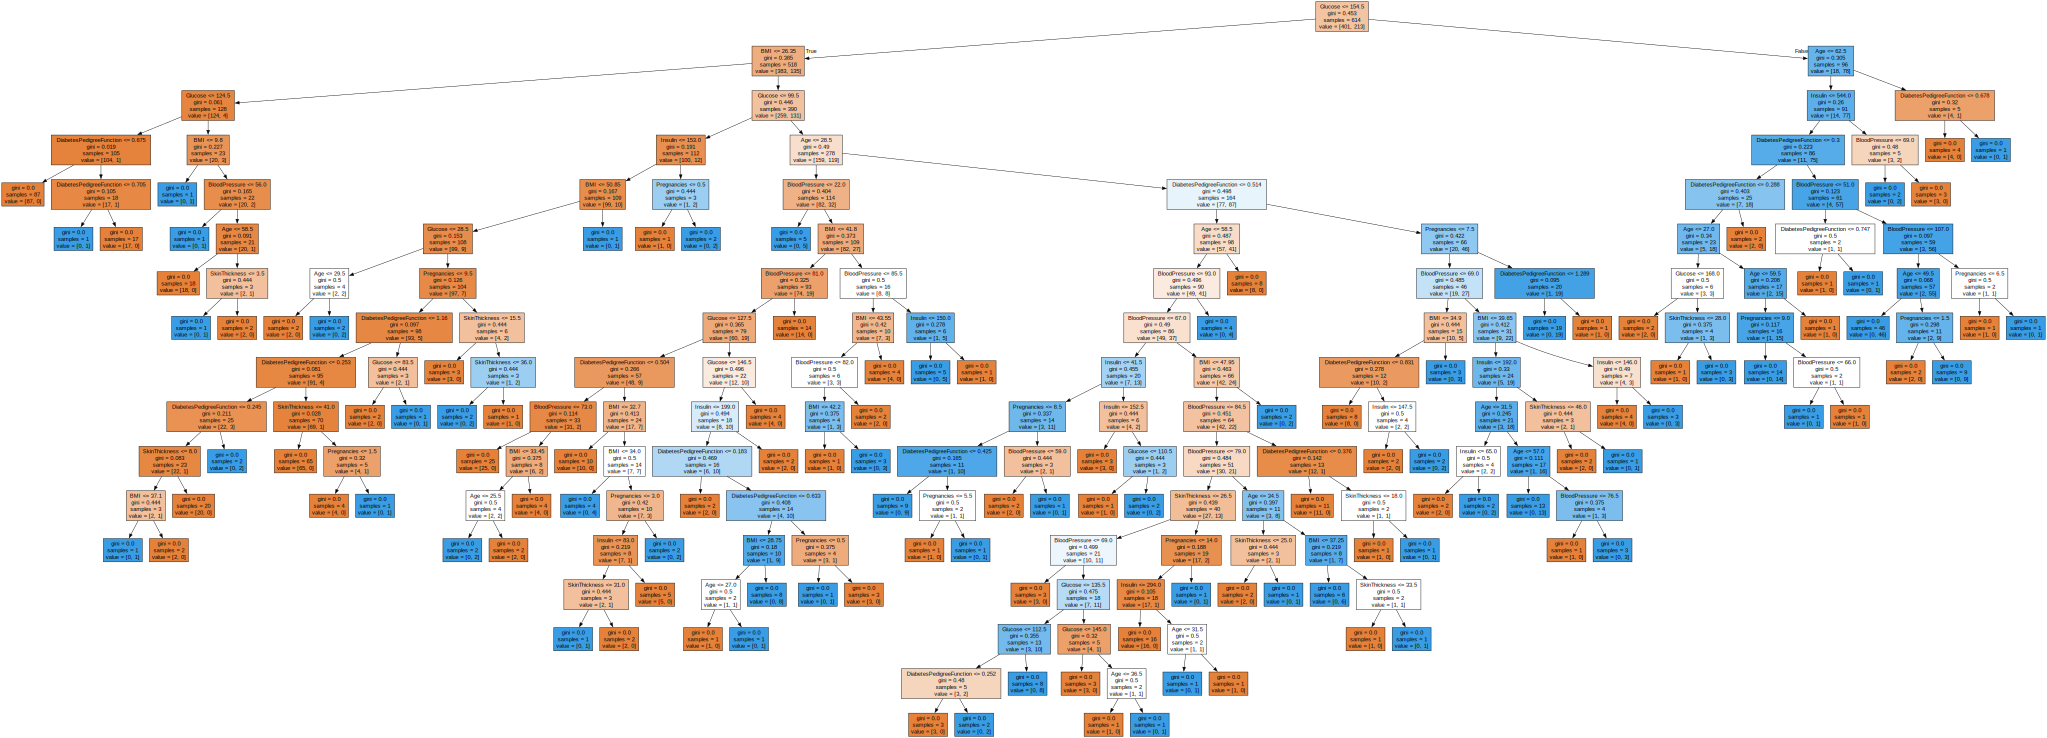

In [25]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)

graphviz.Source(dot_tree)

In [26]:
# 피처의 중요도 추출하기
model.feature_importances_

array([0.07497553, 0.29440628, 0.12816184, 0.05731472, 0.07303224,
       0.1518755 , 0.1144471 , 0.10578679])

<Axes: >

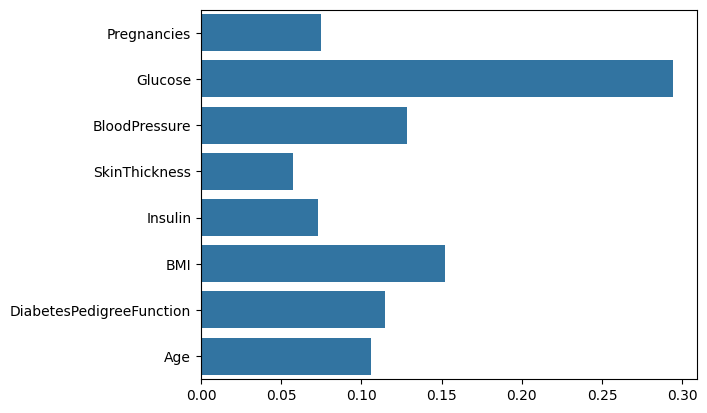

In [27]:
sns.barplot(x=model.feature_importances_,y=feature_names)

### 정확도 측정하기

In [31]:
# 실제값 - 예측값
# 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.

abs(y_test - y_predict).sum()

42

In [32]:
# 예측의 정확도 구하기. 100점 만점에 몇 점?
diff_count = abs(y_test - y_predict).sum()

(len(y_test)-diff_count) / len(y_test) * 100

72.72727272727273

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7272727272727273

In [34]:
model.score(x_test,y_test)

0.7272727272727273